In [642]:
import random
from datetime import datetime

random.seed(datetime.now())

u = [random.uniform(-5, 5) for i in range(6)]
print("u: " + str(u))

u: [-3.1424927091149026, 2.733536093410626, -2.0564627520052903, 3.7370578042310836, 3.36263438232646, 3.226970286810962]


In [643]:
import numpy as np

k = 200

np.random.seed(int(datetime.now().microsecond))

x = np.random.normal(size = k).reshape(k, 1)
y = e = np.random.normal(size = k).reshape(k, 1)
for i in range(6):
    y += u[i] * (x ** i)
y = y[:, 0]
# print("x: " + str(x[:, 0]))
# print("y: " + str(y))

In [644]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X, train_mae, test_mae = x, [], []

for i in range(1, 11):
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    train_mae.append(mean_absolute_error(y_train, reg.predict(x_train)))
    test_mae.append(mean_absolute_error(y_test, reg.predict(x_test)))
    X = np.hstack((X, x ** (i + 1)))
X = X[:, : -1]

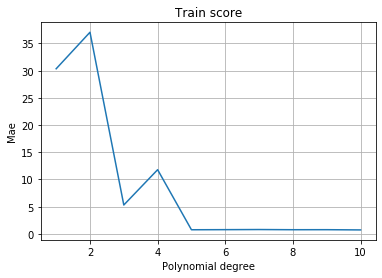

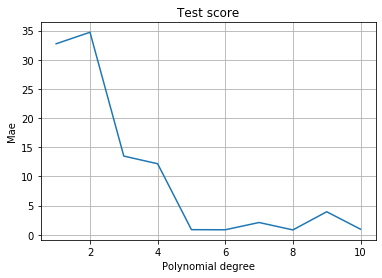

In [645]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

plt.title('Train score')
plt.plot(range(1, 11), train_mae)
plt.xlabel('Polynomial degree')
plt.ylabel('Mae')
plt.grid()
plt.show()

plt.title('Test score')
plt.plot(range(1, 11), test_mae)
plt.xlabel('Polynomial degree')
plt.ylabel('Mae')
plt.grid()
plt.show()

In [646]:
reg = LassoCV(cv = 5, max_iter = 10000)
reg.fit(x_train, y_train)
lasso_mae = mean_absolute_error(y_test, reg.predict(x_test))
 
print("Lasso mae: {}".format(lasso_mae))

Lasso mae: 18.086834261970118


In [647]:
reg = RidgeCV(cv = 5)
reg.fit(x_train, y_train)
ridge_mae = mean_absolute_error(y_test, reg.predict(x_test))

print("Ridge mae: {}".format(ridge_mae))

Ridge mae: 0.9445963380759917


In [648]:
X2 = X[:, :5]
comb1 = 2 * X2[:, 2] + X2[:, 1]
comb1 = np.reshape(comb1, (k, 1))

comb2 = X2[:, 0] + X2[:, 4]
comb2 = np.reshape(comb2, (k, 1))

X2 = np.hstack((X2, comb1))
X2 = np.hstack((X2, comb2))

x_train, x_test, y_train, y_test = train_test_split(X2, y, train_size = 0.7)

In [649]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print("linear regression mae: {}".format(mean_absolute_error(y_test, reg.predict(x_test))))

linear regression mae: 0.8677845569775926


In [650]:
reg = LassoCV(cv = 5, max_iter = 10000)
reg.fit(x_train, y_train)

print("Lasso mae: {}".format(mean_absolute_error(y_test, reg.predict(x_test))))
print("Lasso weights: {}".format(reg.coef_))

Lasso mae: 1.5742420146386955
Lasso weights: [ 0.         -0.          0.          2.77027516  0.          1.72461941
  3.20519438]


In [651]:
reg = RidgeCV(cv = 5)
reg.fit(x_train, y_train)

print("Ridge mae: {}".format(mean_absolute_error(y_test, reg.predict(x_test))))
print("Ridge weights: {}".format(reg.coef_))

Ridge mae: 0.8673871641592368
Ridge weights: [ 0.57447065 -3.03720741  2.0101726   3.35732912  1.31484106  0.9831378
  1.88931171]


10 experiments:
    - more features => better prediction
Ridge and Lasso:
    - Ridge works better than Lasso
Correlation features:
    - Correlation features help a bit
    